# Mapeamento de eventos (notícias) em issues

## Base de Dados com a severidade das isssues

In [1]:
# !gdown 18I5Xf2Gx6effyfri8BnoT2DHIemMKxw6

In [2]:
import pandas as pd

# baseado no IPTC https://www.iptc.org/std/NewsCodes/treeview/mediatopic/mediatopic-en-GB.html
from pathlib import Path

In [3]:
df = pd.read_parquet(f"{Path.cwd()}/iptc_node_issues.parquet")
df

,node_id,node_label,ancestor_path,issue_name,issue_description,issue_signals,issue_related_terms,issue_severity
0,medtop:16000000,"conflict, war and peace","conflict, war and peace",Civilian Casualty Incident,Reports of non-combatant deaths or injuries re...,civilian deaths; collateral damage; hospital s...,,HIGH
1,medtop:16000000,"conflict, war and peace","conflict, war and peace",Military Equipment Deployment,"Movement or use of weapons, vehicles, or syste...",tank columns; artillery fire; drone strike; mi...,,MEDIUM
2,medtop:16000000,"conflict, war and peace","conflict, war and peace",Ceasefire Violation,"Breach of agreed truce terms, often leading to...",ceasefire broken; shelling during truce; peace...,,HIGH
3,medtop:16000000,"conflict, war and peace","conflict, war and peace",Disinformation Campaign,Coordinated spread of false narratives to mani...,fake atrocity claims; propaganda leaflets; bot...,,MEDIUM
4,medtop:16000000,"conflict, war and peace","conflict, war and peace",Humanitarian Access Blockade,Intentional obstruction of aid delivery to con...,aid convoy denied; checkpoint refusal; red cro...,,HIGH
...,...,...,...,...,...,...,...,...
62706,medtop:20001390,ski mountaineering,sport > competition discipline > skiing > ski ...,Goggle lens fogging issues,Vision impairment from goggle fogging during a...,fogged goggles; vision obscured; ascent/descen...,,LOW
62707,medtop:20001390,ski mountaineering,sport > competition discipline > skiing > ski ...,Team decision-making conflicts,"Disagreements over route choices, turn-around ...",argument over route; turnaround dispute; risk ...,,MEDIUM
62708,medtop:20001390,ski mountaineering,sport > competition discipline > skiing > ski ...,Ski boot pressure injuries,Foot injuries like blisters or numbness from i...,blister report; foot numbness; boot fit proble...,,LOW
62709,medtop:20001390,ski mountaineering,sport > competition discipline > skiing > ski ...,Emergency communication message errors,Incorrect or incomplete distress messages sent...,SOS mis-sent; coordinates wrong; message uncle...,,HIGH


In [4]:
list(df.issue_severity.unique())

['HIGH', 'MEDIUM', 'LOW', '']

In [5]:
df_issues = df[df.index < df.shape[0]/10]
# df.node_id.value_counts()

## Base de Notícias (eventos)

In [6]:
# !kaggle datasets download 'tumanovalexander/nyt-articles-data'
# !kaggle datasets download 'jordankrishnayah/45m-headlines-from-2007-2022-10-largest-sites'
# !unzip 45m-headlines-from-2007-2022-10-largest-sites.zip

In [7]:
df_news = pd.read_csv('headlines.csv', parse_dates=['Date'], infer_datetime_format=True, low_memory=False)


df_news['Date'] = pd.to_datetime(df_news['Date'], errors='coerce', infer_datetime_format=True)
start = pd.to_datetime('2018-01-01')
df_news = df_news.loc[df_news['Date'] >= start].copy()

/tmp/ipykernel_3070301/871329970.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_news = pd.read_csv('headlines.csv', parse_dates=['Date'], infer_datetime_format=True, low_memory=False)
/tmp/ipykernel_3070301/871329970.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_news['Date'] = pd.to_datetime(df_news['Date'], errors='coerce', infer_datetime_format=True)


In [8]:
df_news.shape

(1419722, 4)

<Axes: >

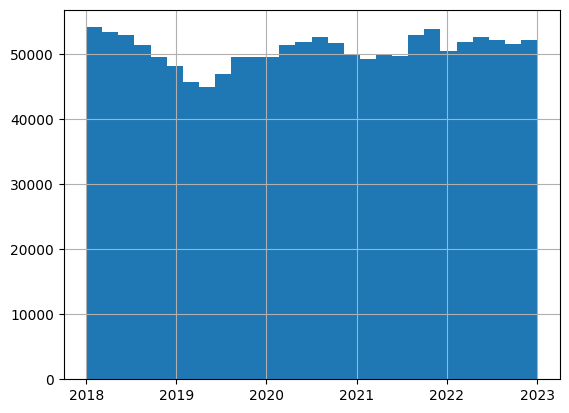

In [9]:
df_news.Date.hist(bins=28)

## Análise de Sentimentos

In [10]:
# !pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as analyzer

Agora vamos processar nossa base de notícias.

In [12]:
from tqdm.notebook import tqdm

L_neg = []
L_neu = []
L_pos = []
analyzer = analyzer()
# for index,row in tqdm(df_news.iterrows(),total=len(df_news)):
for index,row in df_news.iterrows():


  try:
    txt = str(row['Headline'])
    vs = analyzer.polarity_scores(text =txt)
    
    L_neg.append(vs['neg'])
    L_neu.append(vs['neu'])
    L_pos.append(vs['pos'])
  except Exception as e:
    print(e)
    L_neg.append(0)
    L_neu.append(0)
    L_pos.append(0)

In [13]:
df_news['negative'] = L_neg
df_news['neutral'] = L_neu
df_news['positive'] = L_pos
df_news

,Date,Publication,Headline,URL,negative,neutral,positive
2985675,2018-01-01,New York Times,Democrats in High-Tax States Try to Cushion Ne...,https://www.nytimes.com/2017/12/31/business/hi...,0.000,1.000,0.000
2985676,2018-01-01,New York Times,Comments,https://www.nytimes.com/2017/12/28/realestate/...,0.000,1.000,0.000
2985677,2018-01-01,New York Times,"Tax Law Offers Carrot to Gig Workers, at a Cost",https://www.nytimes.com/2017/12/31/business/ec...,0.000,1.000,0.000
2985678,2018-01-01,New York Times,Activists Exploit Effort to Expose Sex Harassment,https://www.nytimes.com/2017/12/31/us/politics...,0.619,0.381,0.000
2985679,2018-01-01,New York Times,Hollywood Women Unveil Action Plan Against Har...,https://www.nytimes.com/2018/01/01/movies/time...,0.368,0.632,0.000
...,...,...,...,...,...,...,...
4405392,2023-01-01,The Guardian,2023 in books Highlights for the year ahead,https://www.theguardian.com/books/2022/dec/31/...,0.000,1.000,0.000
4405393,2023-01-01,The Guardian,The best hopeful films for a new year,https://www.theguardian.com/film/2022/dec/31/s...,0.000,0.444,0.556
4405394,2023-01-01,The Guardian,Obituary Barbara Walters,https://www.theguardian.com/tv-and-radio/2022/...,0.000,1.000,0.000
4405395,2023-01-01,The Guardian,Barbara Walters,https://www.theguardian.com/tv-and-radio/2022/...,0.000,1.000,0.000


In [14]:
df_data = df_news[df_news.negative > df_news.positive]
df_data

,Date,Publication,Headline,URL,negative,neutral,positive
2985678,2018-01-01,New York Times,Activists Exploit Effort to Expose Sex Harassment,https://www.nytimes.com/2017/12/31/us/politics...,0.619,0.381,0.0
2985679,2018-01-01,New York Times,Hollywood Women Unveil Action Plan Against Har...,https://www.nytimes.com/2018/01/01/movies/time...,0.368,0.632,0.0
2985681,2018-01-01,New York Times,North Korea Signals a Possible Thaw in the Nuc...,https://www.nytimes.com/2017/12/31/world/asia/...,0.313,0.687,0.0
2985683,2018-01-01,New York Times,"Korean War, a ‘Forgotten’ Conflict That Shaped...",https://www.nytimes.com/2018/01/01/world/asia/...,0.437,0.563,0.0
2985684,2018-01-01,New York Times,Iranian Authorities Clamp Down as Protests Spread,https://www.nytimes.com/2018/01/01/world/middl...,0.241,0.759,0.0
...,...,...,...,...,...,...,...
4405374,2023-01-01,The Guardian,Xi Jinping’s reputation in China and his stand...,https://www.theguardian.com/commentisfree/2023...,0.204,0.796,0.0
4405377,2023-01-01,The Guardian,The Twitter Files should disturb liberal criti...,https://www.theguardian.com/commentisfree/2023...,0.290,0.710,0.0
4405378,2023-01-01,The Guardian,US response to the climate emergency Key mome...,https://www.theguardian.com/environment/2022/d...,0.224,0.776,0.0
4405387,2023-01-01,The Guardian,Foo Fighters Rock group to carry on as a band...,https://www.theguardian.com/music/2023/jan/01/...,0.298,0.702,0.0


In [15]:
df_data.sample(10)

,Date,Publication,Headline,URL,negative,neutral,positive
3326507,2019-03-12,CNBC,"Actresses Lori Loughlin, Felicity Huffman amon...",https://www.cnbc.com/2019/03/12/feds-uncover-l...,0.310,0.690,0.000
3997710,2021-08-10,Washington Post,Dominion sues Newsmax and One America News ove...,https://www.washingtonpost.com/media/2021/08/1...,0.275,0.725,0.000
3163719,2018-08-06,USA Today,Science ...,https://www.usatoday.com/story/tech/science/20...,0.197,0.682,0.121
4173995,2022-03-17,New York Post,"Rikers Island inmate dies, marking 2nd death i...",https://nypost.com/2022/03/17/2nd-person-on-ri...,0.262,0.738,0.000
4084043,2021-11-23,FOX,WATCH: Teleprompter gaffe exposes how closely ...,https://www.foxnews.com/politics/biden-appears...,0.130,0.870,0.000
3602594,2020-03-20,The Guardian,Smoke from bushfires killed more people than f...,https://www.theguardian.com/australia-news/202...,0.310,0.690,0.000
3700643,2020-07-21,CNBC,Court hearing set for ex-Trump lawyer Michael ...,https://www.cnbc.com/2020/07/21/ex-trump-lawye...,0.366,0.634,0.000
3430786,2019-08-08,New York Post,Selfies could be used to check your blood pres...,https://nypost.com/2019/08/08/selfies-could-be...,0.180,0.820,0.000
3024925,2018-02-17,CNBC,"Flu kills 22 more children, bringing toll to 8...",https://www.cnbc.com/2018/02/16/flu-kills-22-m...,0.421,0.579,0.000
3112584,2018-06-04,CNBC,Skimping can't save seniors from rising medica...,https://www.cnbc.com/2018/06/04/skimping-cant-...,0.226,0.774,0.000


In [ ]:
!gdown 1SJjo4dGW6u0JeCRl8K2WNHYHl1bdDgSz # versao que eu rodei todo o Vader

Downloading...
From (original): https://drive.google.com/uc?id=1SJjo4dGW6u0JeCRl8K2WNHYHl1bdDgSz
From (redirected): https://drive.google.com/uc?id=1SJjo4dGW6u0JeCRl8K2WNHYHl1bdDgSz&confirm=t&uuid=30a60cf2-e6a4-4b8b-8477-419dd260be8d
To: /content/df_data.parquet
100% 112M/112M [00:02<00:00, 51.9MB/s]


In [16]:
#gdown 1SJjo4dGW6u0JeCRl8K2WNHYHl1bdDgSz
df_data = pd.read_parquet("df_data.parquet")
df_data

,Date,Publication,Headline,URL,negative,neutral,positive
0,20070101,New York Times,Rush to Hang Hussein Was Questioned,http://www.nytimes.com/2007/01/01/world/middle...,0.219,0.781,0.0
1,20070101,New York Times,"News Analysis: For Sunnis, Dictators End Is O...",http://www.nytimes.com/2007/01/01/world/middle...,0.255,0.745,0.0
2,20070101,New York Times,Hard Choices Over Video,http://www.nytimes.com/2007/01/01/world/middle...,0.318,0.682,0.0
8,20070101,New York Times,"Grim Milestone in Iraq: 3,000 U.S. Deaths",http://www.nytimes.com/2007/01/01/us/01deaths....,0.381,0.619,0.0
11,20070101,New York Times,"A Century Later, Los Angeles Atones for Water ...",http://www.nytimes.com/2007/01/01/us/01water.h...,0.273,0.727,0.0
...,...,...,...,...,...,...,...
4405374,20230101,The Guardian,Xi Jinping’s reputation in China and his stand...,https://www.theguardian.com/commentisfree/2023...,0.204,0.796,0.0
4405377,20230101,The Guardian,The Twitter Files should disturb liberal criti...,https://www.theguardian.com/commentisfree/2023...,0.290,0.710,0.0
4405378,20230101,The Guardian,US response to the climate emergency Key mome...,https://www.theguardian.com/environment/2022/d...,0.224,0.776,0.0
4405387,20230101,The Guardian,Foo Fighters Rock group to carry on as a band...,https://www.theguardian.com/music/2023/jan/01/...,0.298,0.702,0.0


<Axes: >

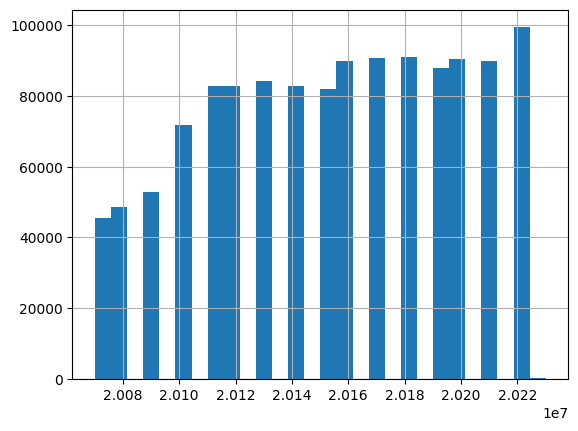

In [17]:
df_data['Date'].hist(bins=28)

In [18]:
from sentence_transformers import SentenceTransformer

# 1. Load a pretrained Sentence Transformer model
model = SentenceTransformer("all-mpnet-base-v2")


In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("all-mpnet-base-v2")


df['embedding'] = list(model.encode(df['issue_name']+' '+df['issue_description'], show_progress_bar=True))
df

Batches:   0%|          | 0/1960 [00:00<?, ?it/s]

,node_id,node_label,ancestor_path,issue_name,issue_description,issue_signals,issue_related_terms,issue_severity,embedding
0,medtop:16000000,"conflict, war and peace","conflict, war and peace",Civilian Casualty Incident,Reports of non-combatant deaths or injuries re...,civilian deaths; collateral damage; hospital s...,,HIGH,"[0.009681889, 0.0072278427, 0.06479828, -0.025..."
1,medtop:16000000,"conflict, war and peace","conflict, war and peace",Military Equipment Deployment,"Movement or use of weapons, vehicles, or syste...",tank columns; artillery fire; drone strike; mi...,,MEDIUM,"[0.018241553, -0.1575114, 0.030541562, -0.0494..."
2,medtop:16000000,"conflict, war and peace","conflict, war and peace",Ceasefire Violation,"Breach of agreed truce terms, often leading to...",ceasefire broken; shelling during truce; peace...,,HIGH,"[0.014334432, -0.05914992, 0.034037787, -0.035..."
3,medtop:16000000,"conflict, war and peace","conflict, war and peace",Disinformation Campaign,Coordinated spread of false narratives to mani...,fake atrocity claims; propaganda leaflets; bot...,,MEDIUM,"[-0.0011547183, -0.012333545, 0.016871352, -0...."
4,medtop:16000000,"conflict, war and peace","conflict, war and peace",Humanitarian Access Blockade,Intentional obstruction of aid delivery to con...,aid convoy denied; checkpoint refusal; red cro...,,HIGH,"[0.015811427, -0.018042374, -0.00798746, -0.00..."
...,...,...,...,...,...,...,...,...,...
62706,medtop:20001390,ski mountaineering,sport > competition discipline > skiing > ski ...,Goggle lens fogging issues,Vision impairment from goggle fogging during a...,fogged goggles; vision obscured; ascent/descen...,,LOW,"[-0.017120859, -0.015578539, 7.717883e-05, -0...."
62707,medtop:20001390,ski mountaineering,sport > competition discipline > skiing > ski ...,Team decision-making conflicts,"Disagreements over route choices, turn-around ...",argument over route; turnaround dispute; risk ...,,MEDIUM,"[0.013348308, -0.0009353872, 0.0016632756, -0...."
62708,medtop:20001390,ski mountaineering,sport > competition discipline > skiing > ski ...,Ski boot pressure injuries,Foot injuries like blisters or numbness from i...,blister report; foot numbness; boot fit proble...,,LOW,"[-0.059730873, -0.09139406, 0.005051088, 0.038..."
62709,medtop:20001390,ski mountaineering,sport > competition discipline > skiing > ski ...,Emergency communication message errors,Incorrect or incomplete distress messages sent...,SOS mis-sent; coordinates wrong; message uncle...,,HIGH,"[0.030505117, -0.10029626, 0.016993072, -0.039..."


# Técnicas otimizadas para cálculo de similaridades

In [ ]:
!pip install faiss-cpu

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 68.4 MB/s eta 0:00:0000:0100:01


In [ ]:
import faiss
import numpy as np

def _to_matrix(emb_list, dtype=np.float32):
    """
    Converte lista de embeddings (list/array por linha) para matriz 2D np.array [N, D].
    """
    if isinstance(emb_list, (list, tuple)) and len(emb_list) > 0 and not isinstance(emb_list[0], (list, tuple, np.ndarray)):
        # usuário passou uma única embedding; tornar [1, D]
        emb_list = [emb_list]
    X = np.asarray(list(emb_list), dtype=dtype)
    if X.ndim != 2:
        raise ValueError(f"Embeddings precisam ser 2D. Shape atual: {X.shape}")
    return X


def _l2_normalize(x: np.ndarray, axis=1, eps=1e-12) -> np.ndarray:
    """
    Normaliza L2 (necessário para usar produto interno como cosseno).
    """
    norm = np.linalg.norm(x, axis=axis, keepdims=True)
    return x / np.maximum(norm, eps)



In [ ]:

import numpy as np
def indexar_ann(issue_matrix_norm: np.ndarray):
    """
    Cria um índice FAISS de Inner Product (para cosseno com vetores normalizados).
    Retorna o index pronto.
    """
    print("indexando...")
    d = issue_matrix_norm.shape[1]
    index = faiss.IndexFlatIP(d)  # FlatIP já é muito rápido mas nao eh ANN (trocar por HNSW para datasets grandes)
    index.add(issue_matrix_norm.astype(np.float32))
    print("indexando... fim")
    return index



# busca com ann
def ann_query_topk(texts, model, index, df_issues: pd.DataFrame, issue_matrix_norm: np.ndarray, k=5, batch_size=64):
    """
    Faz consulta ANN (FAISS) para uma lista de textos 'texts'.
    Retorna um DataFrame com columns: ['query_idx','issue_idx','similarity','issue_name','issue_severity', ...]
    """
    # Encode em batch e normaliza
    Q = model.encode(texts, batch_size=batch_size, convert_to_numpy=True, normalize_embeddings=True)
    if Q.dtype != np.float32:
        Q = Q.astype(np.float32)

    # Busca ANN
    sims, ids = index.search(Q, k)  # sims = produto interno -> como normalizamos, é cosseno em [-1,1]

    # Organiza resultados
    rows = []
    for qi in range(Q.shape[0]):
        for rank in range(k):
            issue_idx = int(ids[qi, rank])
            sim = float(sims[qi, rank])
            row_issue = df_issues.iloc[issue_idx].to_dict()
            rows.append({
                "query_idx": qi,
                "issue_idx": issue_idx,
                "similarity": sim,
                **{k_: row_issue.get(k_) for k_ in df_issues.columns if k_ != "embedding"}
            })
    return pd.DataFrame(rows)


# busca sem nn
def brute_force_topk(texts, model, df_issues: pd.DataFrame, issue_matrix_norm: np.ndarray, k=5, batch_size=64):
    """
    Busca exaustiva: cosseno via produto interno entre consultas normalizadas e matriz de issues normalizada.
    """
    Q = model.encode(texts, batch_size=batch_size, convert_to_numpy=True, normalize_embeddings=True).astype(np.float32)
    # Similaridade cosseno = Q @ issue_matrix_norm.T (pois ambos normalizados)
    sims = np.matmul(Q, issue_matrix_norm.T)  # shape [num_q, num_issues]
    # Top-k por linha
    ids = np.argpartition(-sims, kth=k-1, axis=1)[:, :k]
    # Ordena cada top-k
    rows = []
    for qi in range(Q.shape[0]):
        top_ids = ids[qi]
        # ordenar realmente
        top_sorted = top_ids[np.argsort(-sims[qi, top_ids])]
        for issue_idx in top_sorted:
            sim = float(sims[qi, issue_idx])
            row_issue = df_issues.iloc[int(issue_idx)].to_dict()
            rows.append({
                "query_idx": qi,
                "issue_idx": int(issue_idx),
                "similarity": sim,
                **{k_: row_issue.get(k_) for k_ in df_issues.columns if k_ != "embedding"}
            })
    # mantém apenas os k primeiros por query_idx
    out = pd.DataFrame(rows)
    out = out.groupby("query_idx", as_index=False, group_keys=False).apply(lambda g: g.nlargest(k, "similarity"))
    return out.reset_index(drop=True)



In [ ]:
import time


def _topk_recall_from_results(ann_res: pd.DataFrame, bf_res: pd.DataFrame, k: int) -> dict:
    """
    Calcula métricas de sobreposição entre top-k do ANN e do brute force (referência).
    Retorna:
      - recall_at_k: média de |ANN ∩ BF| / k por query
      - hit_rate: fração de queries com pelo menos 1 acerto no top-k
      - mean_intersection: média do tamanho da interseção por query
    """
    # garante tipos inteiros
    ann_res["query_idx"] = ann_res["query_idx"].astype(int)
    bf_res["query_idx"]  = bf_res["query_idx"].astype(int)
    ann_res["issue_idx"] = ann_res["issue_idx"].astype(int)
    bf_res["issue_idx"]  = bf_res["issue_idx"].astype(int)

    # agrupa por query: conjuntos de issue_idx no top-k
    ann_top = ann_res.groupby("query_idx")["issue_idx"].apply(set)
    bf_top  = bf_res.groupby("query_idx")["issue_idx"].apply(set)

    qs = sorted(set(ann_top.index).intersection(set(bf_top.index)))
    if not qs:
        return {"recall_at_k": 0.0, "hit_rate": 0.0, "mean_intersection": 0.0}

    recalls, hits, inter_sizes = [], [], []
    for q in qs:
        A = ann_top[q]
        B = bf_top[q]
        inter = A.intersection(B)
        inter_sizes.append(len(inter))
        hits.append(1.0 if len(inter) > 0 else 0.0)
        recalls.append(len(inter) / float(k))

    return {
        "recall_at_k": float(np.mean(recalls)),
        "hit_rate": float(np.mean(hits)),
        "mean_intersection": float(np.mean(inter_sizes)),
    }


def benchmark_ann_vs_bruteforce(
    df_issues: pd.DataFrame,
    df_data: pd.DataFrame,
    model,
    text_col="Headline",
    sample_n=200,
    k=5,
):
    """
    Compara latência média de consulta ANN vs brute force (referência) e mede a qualidade do ANN
    via recall@k em relação ao brute force. Não inclui o tempo de criação do índice.
    """
    # Matriz de issues normalizada (uma vez)
    issue_matrix = _to_matrix(df_issues["embedding"].values)
    issue_matrix_norm = _l2_normalize(issue_matrix)

    # Índice FAISS (criação fora do tempo do experimento)
    index = indexar_ann(issue_matrix_norm)

    # Subamostra de consultas
    sample_n = min(sample_n, len(df_data))
    queries = df_data[text_col].astype(str).sample(sample_n, random_state=42).tolist()

    # Warmups (fora do cronômetro)
    _ = ann_query_topk(queries[:5], model, index, df_issues, issue_matrix_norm, k=k)
    _ = brute_force_topk(queries[:5], model, df_issues, issue_matrix_norm, k=k)

    # Tempo ANN
    t0 = time.perf_counter()
    ann_res = ann_query_topk(queries, model, index, df_issues, issue_matrix_norm, k=k)
    t1 = time.perf_counter()

    # Tempo brute force (referência)
    t2 = time.perf_counter()
    bf_res = brute_force_topk(queries, model, df_issues, issue_matrix_norm, k=k)
    t3 = time.perf_counter()

    ann_time = t1 - t0
    bf_time = t3 - t2

    # Métricas de sobreposição
    overlap = _topk_recall_from_results(ann_res, bf_res, k=k)

    return {
        "ann_time_seconds": ann_time,
        "bruteforce_time_seconds": bf_time,
        "ann_qps": sample_n / ann_time if ann_time > 0 else float("inf"),
        "bruteforce_qps": sample_n / bf_time if bf_time > 0 else float("inf"),
        "recall_at_k": overlap["recall_at_k"],       # média de acertos/k
        "hit_rate": overlap["hit_rate"],             # % de queries com ≥1 acerto
        "mean_intersection": overlap["mean_intersection"],  # média de acertos absolutos
    }


stats = benchmark_ann_vs_bruteforce(df, df_data, model, text_col="Headline", sample_n=1000, k=5)
stats

indexando...
indexando... fim


/tmp/ipykernel_3047242/854668046.py:73: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  out = out.groupby("query_idx", as_index=False, group_keys=False).apply(lambda g: g.nlargest(k, "similarity"))
/tmp/ipykernel_3047242/854668046.py:73: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  out = out.groupby("query_idx", as_index=False, group_keys=False).apply(lambda g: g.nlargest(k, "similarity"))


{'ann_time_seconds': 2.6251522451639175,
 'bruteforce_time_seconds': 1.6064134221524,
 'ann_qps': 380.9302876974889,
 'bruteforce_qps': 622.5047588684367,
 'recall_at_k': 1.0,
 'hit_rate': 1.0,
 'mean_intersection': 5.0}

In [ ]:
pd.DataFrame([stats]).T

,0
ann_time_seconds,2.625152
bruteforce_time_seconds,1.606413
ann_qps,380.930288
bruteforce_qps,622.504759
recall_at_k,1.000000
hit_rate,1.000000
mean_intersection,5.000000


# Aplicar para as notícias

In [ ]:
# norma l2 para todas as issues
issue_matrix_norm = _l2_normalize(_to_matrix(df['embedding'].values))

# indexando todas as issues
index = indexar_ann(issue_matrix_norm)

indexando...
indexando... fim


In [ ]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

def anexar_top3_issues(
    df_data: pd.DataFrame,
    model,
    index,
    df_issues: pd.DataFrame,
    issue_matrix_norm: np.ndarray,  # não é usado no corpo, mas mantido caso queira validar dimensões
    text_col: str = "Headline",
    issue_col: str = "issue_name",
    batch_size: int = 64,
    sim_round: int = 4,
) -> pd.DataFrame:
    """
    Anexa 6 colunas ao df_data:
      - 'issue_top1', 'issue_top2', 'issue_top3'
      - 'sim_top1', 'sim_top2', 'sim_top3'  (similaridade cosseno)
    Supõe que:
      - df_issues tem a coluna `issue_col` (ex.: 'issue_name') e está na mesma ordem dos vetores indexados.
      - `index` é FAISS IndexFlatIP (ou compatível) com embeddings normalizados (cos sim via IP).
    """
    # 1) Preparar textos
    texts = df_data[text_col].astype(str).fillna("").tolist()
    if len(texts) == 0:
        # nada a fazer
        for c in ["issue_top1","issue_top2","issue_top3","sim_top1","sim_top2","sim_top3"]:
            df_data[c] = None
        return df_data

    # 2) Encode + normalização (cos via IP)
    print("Encoding...")
    Q = model.encode(texts, batch_size=batch_size, convert_to_numpy=True, normalize_embeddings=True, show_progress_bar=True)
    Q = Q.astype(np.float32, copy=False)

    # 3) Busca ANN (k=3)
    k = 3
    sims, idxs = index.search(Q, k)  # sims em [-1,1] pois embeddings normalizados

    # 4) Mapear ids → nomes de issues
    issues_names = df_issues[issue_col].astype(str).tolist()

    # 5) Montar colunas de saída
    top_names = np.empty((len(df_data), k), dtype=object)
    top_sims  = np.empty((len(df_data), k), dtype=float)

    print("Linkando com issues")
    for i in tqdm(range(len(df_data))):
        for r in range(k):
            issue_id = int(idxs[i, r])
            sim = float(sims[i, r])
            # segurança: pode acontecer de FAISS retornar -1 se não houver base
            name = issues_names[issue_id] if (0 <= issue_id < len(issues_names)) else None
            top_names[i, r] = name
            top_sims[i, r] = round(sim, sim_round)

    # 6) Anexar ao df_data
    df_out = df_data.copy()
    df_out["issue_top1"] = top_names[:, 0]
    df_out["issue_top2"] = top_names[:, 1]
    df_out["issue_top3"] = top_names[:, 2]
    df_out["sim_top1"]   = top_sims[:, 0]
    df_out["sim_top2"]   = top_sims[:, 1]
    df_out["sim_top3"]   = top_sims[:, 2]

    return df_out


In [ ]:
df_data_enriquecido = anexar_top3_issues(
    df_data=df_data[(df_data.Date > 20150101) & (df_data.Date < 20160101)],
    model=model,
    index=index,
    df_issues=df,
    issue_matrix_norm=issue_matrix_norm,
    text_col="Headline",
    issue_col="issue_name",
    batch_size=64,
    sim_round=4,
)

Encoding...


Batches:   0%|          | 0/1277 [00:00<?, ?it/s]

Linkando com issues


  0%|          | 0/81676 [00:00<?, ?it/s]

In [ ]:
df_data_enriquecido

,Date,Publication,Headline,URL,negative,neutral,positive,issue_top1,issue_top2,issue_top3,sim_top1,sim_top2,sim_top3
2103258,20150102,New York Times,Gun Control Groups Turn Focus to State Ballot ...,http://www.nytimes.com/2015/01/03/us/gun-contr...,0.231,0.769,0.000,Referendum Measure Duplication,Ballot measure wording controversy,Referendum Topic Eligibility Challenges,0.5277,0.5215,0.5079
2103261,20150102,New York Times,"Bidding Farewell to Capitol Hill, and the Lost...",http://www.nytimes.com/2015/01/03/us/politics/...,0.173,0.827,0.000,Contracting Favoritism,Abuse of Courtesy Resignation,Excessive partisan rhetoric in chambers,0.4950,0.4946,0.4946
2103262,20150102,New York Times,Stress Test for Top Banker in Europe: Low Infl...,http://www.nytimes.com/2015/01/04/business/str...,0.386,0.472,0.142,Stagflation Risk Indicators,Inflation-Related Central Bank Credibility Crisis,Inflation Targeting Failure,0.5317,0.5180,0.5117
2103263,20150102,New York Times,Hints of Stimulus Push Euro Lower Against Dollar,http://www.nytimes.com/2015/01/03/business/int...,0.239,0.761,0.000,Government stimulus measures,Currency depreciation trends,Currency appreciation pressure,0.4268,0.4168,0.3973
2103272,20150102,New York Times,Argentina to Extradite 9/11 ‘Truther’ on Killi...,http://www.nytimes.com/2015/01/03/world/americ...,0.386,0.614,0.000,Evidence obtained through torture,Extradition treaty interpretation conflicts,Extradition for journalistic activities,0.4591,0.4333,0.4289
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394513,20151231,The Guardian,Donald Trump blasts Barack Obama for watching ...,http://www.theguardian.com/film/2015/dec/31/do...,0.310,0.690,0.000,Inappropriate Social Media Use,Unaized Use of Historical Figures,Historical disrespect in media,0.3212,0.3075,0.3031
2394520,20151231,The Guardian,'I cannot look at that picture' Tima Kurdi on...,http://www.theguardian.com/world/2015/dec/31/a...,0.178,0.822,0.000,Historical MIA cases unresolved,Public mourning as protest,Privileged Access to Private Moments,0.3829,0.3758,0.3531
2394521,20151231,The Guardian,Tima Kurdi on how the death of her nephew Alan...,http://www.theguardian.com/world/2015/dec/31/a...,0.245,0.755,0.000,Historical MIA cases unresolved,Child-Specific Atrocity,Public mourning as protest,0.3785,0.3605,0.3588
2394522,20151231,The Guardian,Making a Murderer Another blow to our conf...,http://www.theguardian.com/tv-and-radio/2015/d...,0.272,0.533,0.195,Politicization of Law Enforcement,Pursuit of non-violent suspects,Arrest Based on Anonymous Tips,0.5381,0.5145,0.4989


In [ ]:
df_data_enriquecido.sample(500)

,Date,Publication,Headline,URL,negative,neutral,positive,issue_top1,issue_top2,issue_top3,sim_top1,sim_top2,sim_top3
2231387,20150603,USA Today,Today in the SkySouthwest fares drop below $10...,http://www.usatoday.com/story/todayinthesky/20...,0.174,0.826,0.0,Fare splitting dispute,Microburst Encounter,Airline Fuel Surcharge Abuse,0.3066,0.3004,0.2961
2224950,20150526,FOX,"Gunman, 1 other killed in ND Walmart shooting",http://www.foxnews.com/us/2015/05/26/2-dead-se...,0.391,0.609,0.0,Retail store shooting,Drive-through shooting,Delivery driver shooting,0.3392,0.3198,0.3146
2335140,20151017,New York Times,Palestinians Burn Jewish Holy Site in West Ban...,http://www.nytimes.com/2015/10/17/world/middle...,0.299,0.701,0.0,Arson at cultural heritage sites,Arson at religious sites,Desecration of Jewish sites,0.4504,0.4451,0.4079
2200035,20150423,The Guardian,Ferguson Michael Brown parents sue city in wro...,http://www.theguardian.com/us-news/2015/apr/23...,0.420,0.580,0.0,Municipal court injustice,Race Insurance Claim Disputes,Housing discrimination complaints,0.3277,0.3156,0.2962
2296464,20150827,FOX,AP sues over FBI ploy involving fake news story,http://www.foxnews.com/politics/2015/08/27/ap-...,0.279,0.721,0.0,Fake News Laws Misuse,Abuse of National Security Claims,Evidence obtained illegally,0.4539,0.4472,0.4343
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140079,20150213,CNN,What will hurt ISIS,http://www.cnn.com/2015/02/06/opinion/bergen-i...,0.531,0.469,0.0,False flag attacks blamed on Shia,Destruction of vital infrastructure,Sunni Community Cybersecurity Threats,0.4991,0.4894,0.4834
2337606,20151020,BBC,Four clues hidden in the new Star Wars trailer,http://www.bbc.com/culture/story/20151020-clue...,0.310,0.690,0.0,Exclusive story coordination failure,Sensitive Military Information Leak,Unaired Content Leaks,0.3462,0.3274,0.3209
2115131,20150115,USA Today,Ohio man suspected in ISIL-inspired plot17 hou...,http://www.usatoday.com/story/news/nation/2015...,0.160,0.840,0.0,Terrorist plot detection,Post-blast radicalization spike,Sunni Youth Radicalization,0.4201,0.4103,0.3941
2344719,20151029,USA Today,Nation ...,http://www.usatoday.com/story/news/nation/2015...,0.211,0.789,0.0,In-flight fire,In-Flight Fire,Nacelle fire incidents,0.5104,0.5055,0.5025


In [ ]:
df_data_enriquecido.columns

Index(['Date', 'Publication', 'Headline', 'URL', 'negative', 'neutral',
       'positive', 'issue_top1', 'issue_top2', 'issue_top3', 'sim_top1',
       'sim_top2', 'sim_top3'],
      dtype='object')

In [ ]:
# pip install plotly pandas
import pandas as pd
import plotly.express as px

def fig_issues_mais_frequentes(df: pd.DataFrame, top_n: int = 20):
    """
    Conta frequência total de issues considerando issue_top1/2/3 e plota um gráfico de barras (Plotly).
    """
    s = pd.concat([df["issue_top1"], df["issue_top2"], df["issue_top3"]], ignore_index=True)
    s = s.dropna().astype(str).str.strip()
    s = s[s != ""]
    freq = s.value_counts().reset_index()
    freq.columns = ["issue", "count"]
    freq = freq.head(top_n).iloc[::-1]  # barras horizontais do menor→maior

    fig = px.bar(
        freq,
        x="count",
        y="issue",
        orientation="h",
        title=f"Issues mais frequentes (Top {len(freq)})",
        labels={"count": "Ocorrências", "issue": "Issue"},
    )
    fig.update_layout(yaxis_title="", xaxis_showgrid=True)
    return fig


def fig_serie_temporal_issue(df: pd.DataFrame, issue: str, date_col: str = "Date", rolling: int = 0):
    """
    Série temporal MÊS a MÊS da frequência de uma issue (aparecendo em top1/2/3), com Date no formato YYYYMMDD.
    - Converte internamente o campo de data.
    - 'rolling' aplica média móvel (0 = sem suavização).
    """
    if date_col not in df.columns:
        raise ValueError(f"A coluna '{date_col}' é obrigatória.")

    # Converte YYYYMMDD → datetime
    dd = df.copy()
    dd[date_col] = pd.to_datetime(dd[date_col].astype(str), format="%Y%m%d", errors="coerce")
    dd = dd.dropna(subset=[date_col])

    # filtra a issue em qualquer top
    mask = (
        (dd["issue_top1"] == issue) |
        (dd["issue_top2"] == issue) |
        (dd["issue_top3"] == issue)
    )
    dd = dd.loc[mask].copy()

    if dd.empty:
        return px.line(title=f"Série temporal — {issue} (sem dados)")

    # agrega por mês
    dd["year_month"] = dd[date_col].dt.to_period("M").dt.to_timestamp()
    ts = (
        dd.groupby("year_month")
          .size()
          .reset_index(name="count")
          .sort_values("year_month")
    )

    y_col, y_label = "count", "Frequência"
    if rolling and rolling > 1:
        ts["count_smooth"] = ts["count"].rolling(rolling, min_periods=1).mean()
        y_col = "count_smooth"
        y_label = f"Frequência (média móvel {rolling})"

    fig = px.line(
        ts, x="year_month", y=y_col, markers=True,
        title=f"Série temporal — {issue}",
        labels={"year_month": "Mês", y_col: y_label},
    )
    fig.update_layout(xaxis=dict(dtick="M1", tickformat="%Y-%m"))
    return fig 


In [ ]:
# Top issues gerais
fig1 = fig_issues_mais_frequentes(df_data_enriquecido, top_n=20)
fig1.show()

In [ ]:
fig2 = fig_serie_temporal_issue(df_data_enriquecido, issue="Sovereign debt crisis", rolling=3)
fig2.show()

In [ ]:
fig2 = fig_serie_temporal_issue(df_data_enriquecido, issue="Homicide with firearm", rolling=3)
fig2.show()

# Exportar o grafo de issues/classe de problemas

In [ ]:
import networkx as nx

In [ ]:
limiar_min = 0.55

G = nx.Graph()
node_id = {}

for index,row in tqdm(df_data_enriquecido.iterrows(),total=len(df_data_enriquecido)):
  node1 = row['issue_top1']
  node2 = row['issue_top2']
  node3 = row['issue_top3']
  node4 = row['Headline']

  # adicionando um id para cada vertice
  if node1 not in node_id: node_id[node1] = len(node_id)+1
  if node2 not in node_id: node_id[node2] = len(node_id)+1
  if node3 not in node_id: node_id[node3] = len(node_id)+1
  if node4 not in node_id: node_id[node4] = len(node_id)+1

  if row['sim_top1'] > limiar_min:
    G.add_edge(node_id[node1],node_id[node4])
    G.nodes[node_id[node1]]['txt'] = node1
    G.nodes[node_id[node4]]['txt'] = node4
    G.nodes[node_id[node1]]['type'] = "issue"
    G.nodes[node_id[node4]]['type'] = "event"

  if row['sim_top2'] > limiar_min:
    G.add_edge(node_id[node2],node_id[node4])
    G.nodes[node_id[node2]]['txt'] = node2
    G.nodes[node_id[node4]]['txt'] = node4
    G.nodes[node_id[node2]]['type'] = "issue"
    G.nodes[node_id[node4]]['type'] = "event"

  if row['sim_top3'] > limiar_min:
    G.add_edge(node_id[node3],node_id[node4])
    G.nodes[node_id[node3]]['txt'] = node3
    G.nodes[node_id[node4]]['txt'] = node4
    G.nodes[node_id[node3]]['type'] = "issue"
    G.nodes[node_id[node4]]['type'] = "event"



  0%|          | 0/81676 [00:00<?, ?it/s]

In [ ]:
G.number_of_nodes()

22434

In [ ]:
L = []

for edge in G.edges():
  L.append([edge[0],edge[1]])

df_edges = pd.DataFrame(L)
df_edges.columns = ['source','target']
df_edges.to_csv('edges.csv')

In [ ]:
df_edges

,source,target
0,41,43
1,41,26654
2,41,26804
3,41,32498
4,43,42
...,...,...
26870,6713,97912
26871,97929,97927
26872,97929,97928
26873,97933,48982


In [ ]:
L = []
for node in G.nodes():
  L.append([node,G.nodes[node]['txt'],G.nodes[node]['type']])

df_nodes = pd.DataFrame(L)
df_nodes.columns = ['id','txt','type']
df_nodes.to_csv('nodes.csv',index=False)

df_nodes

,id,txt,type
0,41,Forex liquidity stress testing failures,issue
1,43,A Stress Test for Mario Draghi and the Europea...,event
2,42,Monetary Policy Communication Breakdown,issue
3,10,Inflation-Related Central Bank Credibility Crisis,issue
4,63,Unauthorized genetically modified crop cultiva...,issue
...,...,...,...
22429,48982,Sports Governance Corruption,issue
22430,97937,New Orleans Shadow of violence hangs over New...,event
22431,97938,Shadow of violence hangs over New Year’s celeb...,event
22432,1197,Public holiday public intoxication,issue


# Ideias para desenvolvimento da Atividade

* Melhorar o analisador de sentimento.

Estender o Lexico do Vader.
Usar um modelo de analise de sentimento pretreinado (https://huggingface.co/models?pipeline_tag=text-classification&sort=trending&search=sentiment)

* Testar outros modelos de embedding

* Selecionar um subtema de issue / classe de problemas
financas, medica, educacao, violencia urbana, etc..

Rodar para pelo menos um decada de noticias.
